In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\Jay Rathod\Downloads\Churn_Modelling.csv")

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
for i in dataset.columns:
    print({i: dataset[i].unique()})

{'RowNumber': array([    1,     2,     3, ...,  9998,  9999, 10000], dtype=int64)}
{'CustomerId': array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319],
      dtype=int64)}
{'Surname': array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)}
{'CreditScore': array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 4

In [6]:
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

In [7]:
print(X.shape)
print(Y.shape)

(10000, 10)
(10000,)


In [8]:
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

In [9]:
X = pd.concat([X, geography, gender],axis=1)

In [10]:
X = X.drop(["Geography","Gender"],axis=1)

In [11]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [13]:
# Splitting the data into train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU, Dropout

In [21]:
# INITIAL ANN NETWORK

classifier = Sequential()

# Adding i/p layer and first hidden layer

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

# Adding second hidden layer

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Adding output layer 

classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [22]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compiling the ANN Network

classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [25]:
model_history = classifier.fit(X_train, Y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
560/560 [==============================] - 1s 1ms/step - loss: 0.6904 - accuracy: 0.6562 - val_loss: 0.5151 - val_accuracy: 0.7854
Epoch 2/100
560/560 [==============================] - 1s 1ms/step - loss: 0.4802 - accuracy: 0.7920 - val_loss: 0.4604 - val_accuracy: 0.8046
Epoch 3/100
560/560 [==============================] - 1s 1ms/step - loss: 0.4455 - accuracy: 0.7964 - val_loss: 0.4361 - val_accuracy: 0.8100
Epoch 4/100
560/560 [==============================] - 1s 1ms/step - loss: 0.4263 - accuracy: 0.8100 - val_loss: 0.4223 - val_accuracy: 0.8200
Epoch 5/100
560/560 [==============================] - 1s 1ms/step - loss: 0.4115 - accuracy: 0.8213 - val_loss: 0.4089 - val_accuracy: 0.8246
Epoch 6/100
560/560 [==============================] - 1s 1ms/step - loss: 0.3947 - accuracy: 0.8343 - val_loss: 0.3937 - val_accuracy: 0.8321
Epoch 7/100
560/560 [==============================] - 1s 1ms/step - loss: 0.3786 - accuracy: 0.8450 - val_loss: 0.3806 - val_accuracy: 0.8417

Epoch 58/100
560/560 [==============================] - 1s 1ms/step - loss: 0.3284 - accuracy: 0.8659 - val_loss: 0.3421 - val_accuracy: 0.8575
Epoch 59/100
560/560 [==============================] - 1s 1ms/step - loss: 0.3279 - accuracy: 0.8648 - val_loss: 0.3393 - val_accuracy: 0.8621
Epoch 60/100
560/560 [==============================] - 1s 1ms/step - loss: 0.3277 - accuracy: 0.8661 - val_loss: 0.3400 - val_accuracy: 0.8608
Epoch 61/100
560/560 [==============================] - 1s 1ms/step - loss: 0.3283 - accuracy: 0.8661 - val_loss: 0.3415 - val_accuracy: 0.8596
Epoch 62/100
560/560 [==============================] - 1s 1ms/step - loss: 0.3283 - accuracy: 0.8657 - val_loss: 0.3399 - val_accuracy: 0.8608
Epoch 63/100
560/560 [==============================] - 1s 1ms/step - loss: 0.3283 - accuracy: 0.8664 - val_loss: 0.3408 - val_accuracy: 0.8612
Epoch 64/100
560/560 [==============================] - 1s 1ms/step - loss: 0.3278 - accuracy: 0.8655 - val_loss: 0.3419 - val_accuracy:

In [26]:
#list all the data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


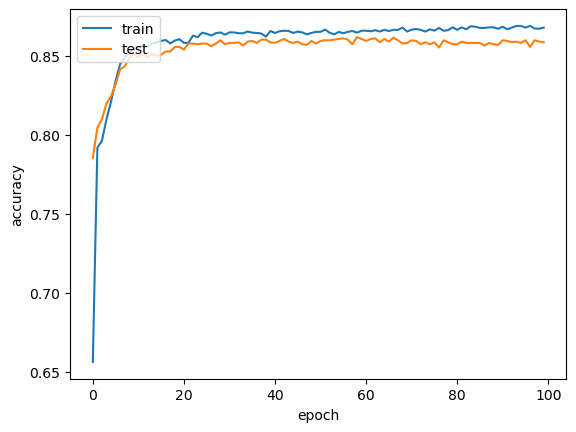

In [29]:
# Summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# prediction on test data

Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred>0.5)

from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
score = accuracy_score(Y_test, Y_pred)

63/63 [==============================] - 0s 651us/step


In [31]:
print(cm)
print(score)

[[1513   65]
 [ 233  189]]
0.851
